# Internshala Data Science Challenge

## Problem Statement
#### We are provided with data set that contains information about the insurance holders along with the target variable that tells us if the insurance premium was paid on time. We need to build a model that can predict the probability for the next premium being paid on time.

We begin by importing the desired libraries for preprocessing, visualizing and building the model from the data.

In [1]:
#Library for reading the data from CSV file into data frame.
import pandas as pd
#Library for performing numerical operations.
import numpy as np
#Library for visualizing the data and graphical analysis.
from matplotlib import pyplot as plt
import seaborn as sns
#Library for preprocessing and model building from the data.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

The next step is to load the data into data frame and then perform various analysis on the data.

In [2]:
#Loading data from CSV file into pandas data frame.
train_data = pd.read_csv('train.csv')
#Reading first few rows from the data frame.
train_data.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [3]:
#Printing The Shape of data set and finding the balance of data set for different ouput classes.
print(train_data.shape)
print(train_data['target'].value_counts())

(79853, 12)
1    74855
0     4998
Name: target, dtype: int64


The data set is highly unbalanced with the ratio of approximately 15:1 for majority class to minority class. Taking this into account, it would be necessary to down sample the training data set.

## Treating The Null Values

Checking the data types of all the columns along with the null values present in the data set.

In [4]:
#Finding the null value frame from the data set and then evaluating the column wise sum.
train_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [5]:
train_data['Count_3-6_months_late'].fillna(train_data['Count_3-6_months_late'].mode()[0], inplace = True)
train_data['Count_6-12_months_late'].fillna(train_data['Count_6-12_months_late'].mode()[0], inplace = True)
train_data['Count_more_than_12_months_late'].fillna(train_data['Count_more_than_12_months_late'].mode()[0], inplace = True)
train_data['application_underwriting_score'].fillna(train_data['application_underwriting_score'].mean(), inplace = True)

In [6]:
#Checking if any null values are still present in the data set.
train_data.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

#### Clearly, we observe that all the null values have been treated accordingly and no null values are present in the data set.

## Univariate Analysis

#### We will observe each and every independent variable for any kind of transformation requirements.

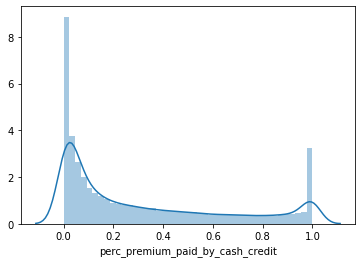

In [7]:
sns.distplot(train_data['perc_premium_paid_by_cash_credit'])

The graph is bimodal in nature having two peaks which shows that most of the people either prefer to pay maximum part of the insurance premium through cash/credit or the prefer to pay the entire amount through some other sources.

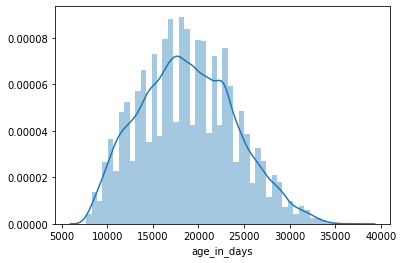

In [8]:
sns.distplot(train_data['age_in_days'])

The graph is approximately normal distribution for the age of policy holders showing that maximum of the policy holders are within the age group of 15k to 25k days of age.

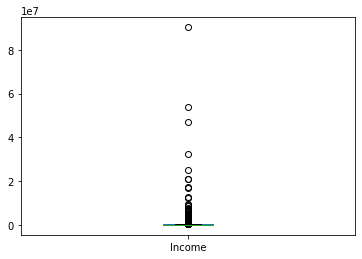

In [9]:
train_data['Income'].plot.box()

A large number of people have income much greater than the normal range of income of most of the policy holders.

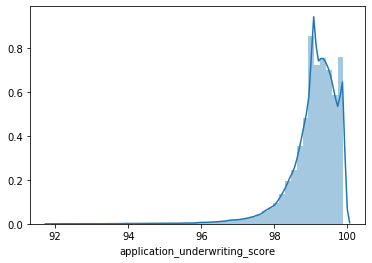

In [10]:
sns.distplot(train_data['application_underwriting_score'])

Most of the scores lie between the range of 90 and 100, so it would be a good approach to normalize them.

In [11]:
#Normalizing the 'application_underwriting_score'.
scaler = MinMaxScaler()
#Reshaping the array to represent it column wise.
temp = np.array(train_data['application_underwriting_score']).reshape(-1,1)
#Storing the transformed result back to the data frame.
train_data['application_underwriting_score'] = scaler.fit_transform(temp)

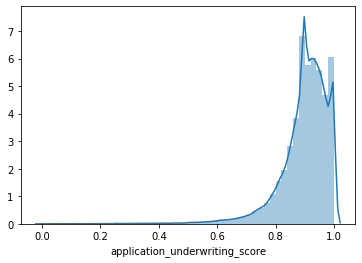

In [12]:
sns.distplot(train_data['application_underwriting_score'])

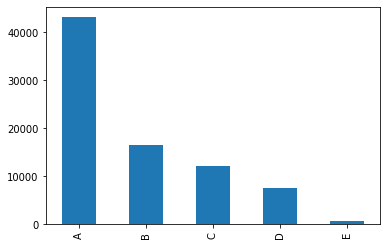

In [13]:
#Drawing the bar graph for different types of sourcing channel.
train_data['sourcing_channel'].value_counts().plot.bar()

Majority of policy holders have purchased or acquired the policy from sourcing channel 'A'.

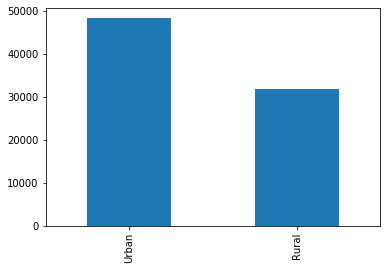

In [14]:
#Drawing the bar graph for different types of residence area type.
train_data['residence_area_type'].value_counts().plot.bar()

Majority of people live in urban areas while there is still a significant portion of policy holders who belong to rural areas.

## Bivariate Analysis

#### Analysing the correlation for all the numerical data in the data set and analyzing the possibilty of multi collinearity before building the model from the data.

Before analyzing the correlation between different variables in the data set, it would be a good approach to convert the categorical data into numerical data by obtaining the dummy data from the actual data set.

In [15]:
#Preparing the dummy data for converting categorical variables into numerical variables.
train_data = pd.get_dummies(train_data)

<function matplotlib.pyplot.show(*args, **kw)>

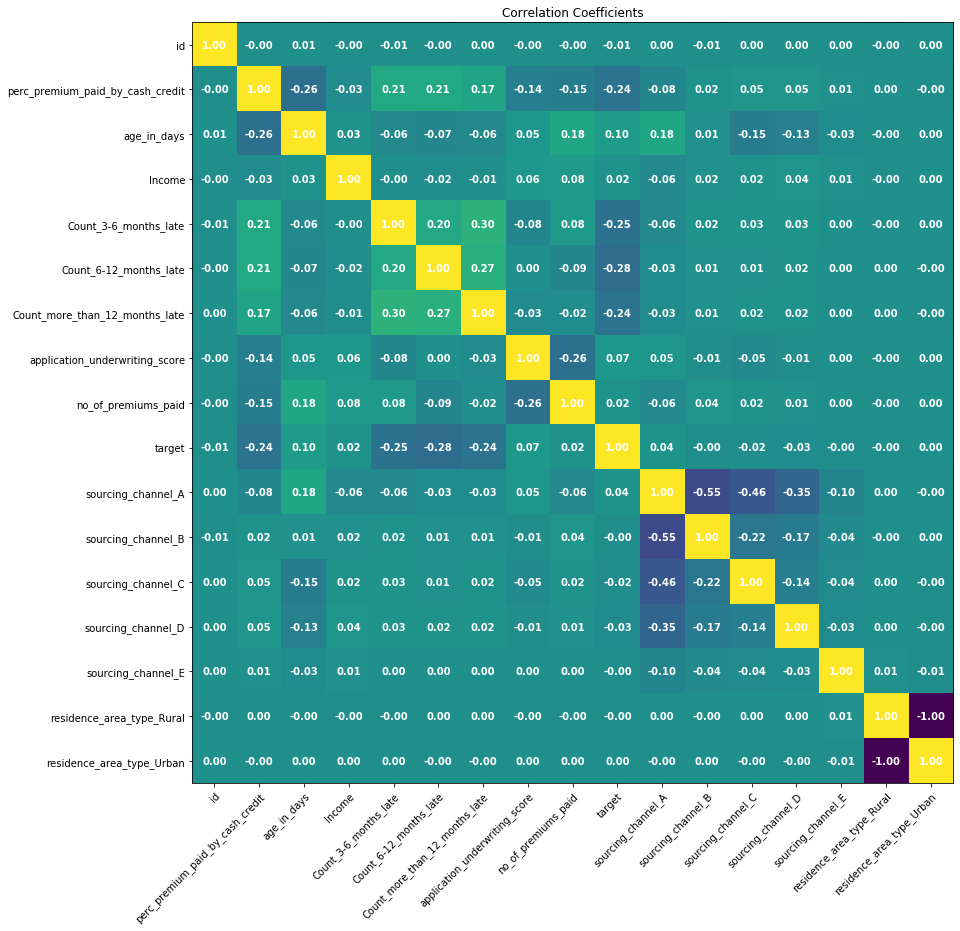

In [16]:
#Evaluating the correlation coefficients data frame.
temp = train_data.corr()
c_name = temp.columns

#Representing the data frame using the heatmap.
fig, ax = plt.subplots(figsize = (14, 14))
im = ax.imshow(temp)
ax.set_xticks(np.arange(len(c_name)))
ax.set_yticks(np.arange(len(c_name)))
ax.set_xticklabels(c_name)
ax.set_yticklabels(c_name)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode = 'anchor')
for i in range(len(c_name)):
    for j in range(len(c_name)):
        text = ax.text(j, i, f'{temp[c_name[i]][c_name[j]]:.2f}', ha='center', va = 'center', color = 'w', weight = 'bold')
ax.set_title('Correlation Coefficients')
plt.show

## Model Building

### Logistic Regresssion Model

#### The problem statement tells us to predict the probabilty for the payment of policy premium being on time, so it requires the logistic regression model.

In [17]:
#Creating the object for logistic regression class.
log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')

In [18]:
#Down sampling the data set to minimize the unbalance between the two classes.

#Including all the observations from class '0'.
train_0 = train_data[train_data['target'] == 0]
train_1 = train_data[train_data['target'] == 1]
#Including only 25000 observations from class '1'.
train_data = train_0.append(train_1.sample(25000))
#This will reduce the ratio of minority to majority class from 1:15 to 1:5.

In [19]:
#Extracting the required independent variables from training data set that are significant features.
imp_features = ['perc_premium_paid_by_cash_credit', 'Count_3-6_months_late', 'Count_6-12_months_late',
                    'Count_more_than_12_months_late']

In [20]:
#Preparing the training data set by splitting it between predictors and target variables.

#Extracting the important features from the down sampled data set.
X_train = train_data[imp_features]
#Extracting the dependent variable.
y_train = train_data['target']
#Training the model with the training data set.
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#Getting the performance score of the model for training data set.
print(log_reg.score(X_train, y_train))

0.860924061604107


## Predicting Probabilities For Test Data

In [22]:
#Reading the test data.
test_data = pd.read_csv('test.csv')

In [23]:
#Performing the same preprocessing on the test data as performed on train data.

#Filling the null values with the appropriate values from mean or mode.
test_data['Count_3-6_months_late'].fillna(test_data['Count_3-6_months_late'].mode()[0], inplace = True)
test_data['Count_6-12_months_late'].fillna(test_data['Count_6-12_months_late'].mode()[0], inplace = True)
test_data['Count_more_than_12_months_late'].fillna(test_data['Count_more_than_12_months_late'].mode()[0], inplace = True)
test_data['application_underwriting_score'].fillna(test_data['application_underwriting_score'].mean(), inplace = True)

#Normalizing the 'application_underwriting_score'.
scaler = MinMaxScaler()
#Reshaping the array to represent it column wise.
temp = np.array(test_data['application_underwriting_score']).reshape(-1,1)
#Storing the transformed result back to the data frame.
test_data['application_underwriting_score'] = scaler.fit_transform(temp)

#Preparing the dummy data for converting categorical variables into numerical variables.
test_data = pd.get_dummies(test_data)

In [24]:
#Obtaining the independent Variables from the testing data set.
X_test = test_data[imp_features]

#Obtaining the probability values from the trained model.
probab = log_reg.predict_proba(X_test)

In [25]:
# As the 'out_probab' contains probabilites for both the classes, we need the probabilities for the class '1' only.
out_prob = np.array(list(map(lambda x: x[1], probab)))

In [26]:
#Saving the obtained results to the ouput CSV file.
new_frame = pd.DataFrame()
new_frame['id'] = test_data['id']
new_frame['target'] = out_prob
new_frame.to_csv('Final_Submission.csv', header = True, index = False)

#### We finally have the ouput in the CSV file with the appropriate format as mentioned in the problem statement with the file name as 'Final_Submission.csv' that contains the 'id' of the policy holder and the 'target' value containing the probability that the policy holder will pay the premium on time.